# What is the Generation Z (10-30 yr-old) doing?
> - Generation Z, colloquially known as Zoomers, is the demographic cohort succeeding Millennials and preceding Generation Alpha. Researchers and popular media use the mid-to-late 1990s as starting birth years and the early 2010s as ending birth years.<br>
> - college students

In [1]:
import pandas as pd

In [43]:
df = pd.read_csv('../data/kaggle_survey_2020_responses.csv')

/Users/maoshirley/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# the age range
df['Q1'].unique().tolist()

['What is your age (# years)?',
 '35-39',
 '30-34',
 '22-24',
 '25-29',
 '18-21',
 '55-59',
 '50-54',
 '40-44',
 '60-69',
 '45-49',
 '70+']

# 1. Company size choice

## Age Group 1 (College Student): 18-21 years old

In [5]:
index_age_group_1 = df[df['Q1'] == '18-21'].index.tolist()
age_group1 = df.iloc[index_age_group_1]

In [6]:
#find where the question is --> column 107
import numpy as np
x = np.where(df.values == 'What is the size of the company where you are employed?')
df.columns[107]

'Q20'

In [7]:
age_ComSize = pd.concat([age_group1['Q1'],age_group1['Q20']],axis = 1)

In [8]:
#most 18-21 are still college students
age_ComSize.fillna('Other',inplace = True)
age_ComSize.rename(columns = {'Q20':'company size','Q1':'age range'}, inplace = True)

In [9]:
age_Comsize_encode = pd.get_dummies(age_ComSize['company size'])

In [10]:
import matplotlib.pyplot as plt

/Users/maoshirley/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  


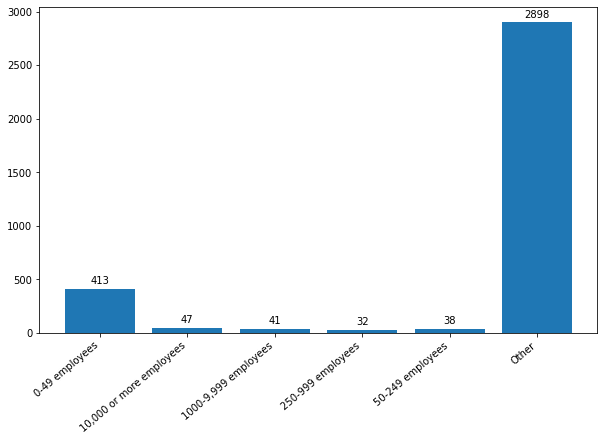

In [11]:
fig,ax = plt.subplots(figsize = (10,6))
ax.set_xticklabels(age_Comsize_encode.columns,rotation=40, ha="right")
bar1 = ax.bar(age_Comsize_encode.columns,height = age_Comsize_encode.sum())

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(bar1)
plt.show()

## Age Group 2: 22-24 years old

In [12]:
index_age_group_2 = df[df['Q1'] == '22-24'].index.tolist()
age_group_2 = df.iloc[index_age_group_2]

In [13]:
age_group_2 = pd.concat([age_group_2['Q1'],age_group_2['Q20']],axis = 1)

In [14]:
#most 18-21 are still college students
age_group_2.fillna('Other',inplace = True)
age_group_2.rename(columns = {'Q20':'company size','Q1':'age range'}, inplace = True)

In [15]:
age_group_2_encode = pd.get_dummies(age_group_2['company size'])

/Users/maoshirley/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  


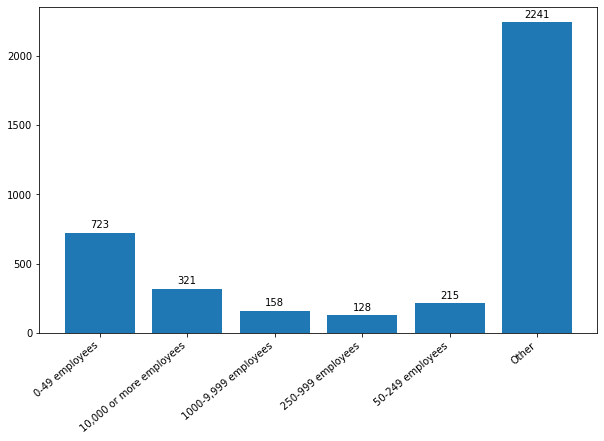

In [16]:
fig,ax = plt.subplots(figsize = (10,6))
ax.set_xticklabels(age_group_2_encode.columns,rotation=40, ha="right")
bar2 = ax.bar(age_group_2_encode.columns,height = age_group_2_encode.sum())

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(bar2)
plt.show()

## Age Group 3: 25-29 years old

In [17]:
cols = ['0-49 employees','50-249 employees','250-999 employees','1000-9,999 employees','10,000 or more employees','Other']

In [19]:
index_age_group_3 = df[df['Q1'] == '25-29'].index.tolist()
age_group_3 = df.iloc[index_age_group_3]

In [20]:
age_group_3 = pd.concat([age_group_3['Q1'],age_group_3['Q20']],axis = 1)

In [21]:
#most 18-21 are still college students
age_group_3.fillna('Other',inplace = True)
age_group_3.rename(columns = {'Q20':'company size','Q1':'age range'}, inplace = True)

In [23]:
age_group_3_encode = pd.get_dummies(age_group_3['company size'])

In [24]:
age_group1_dict = age_Comsize_encode.sum().to_dict()
age_group2_dict = age_group_2_encode.sum().to_dict()
age_group3_dict = age_group_3_encode.sum().to_dict()

In [26]:
age_group_2_encode = age_group_2_encode[cols]
age_Comsize_encode = age_Comsize_encode[cols]
age_group_3_encode = age_group_3_encode[cols]

/Users/maoshirley/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


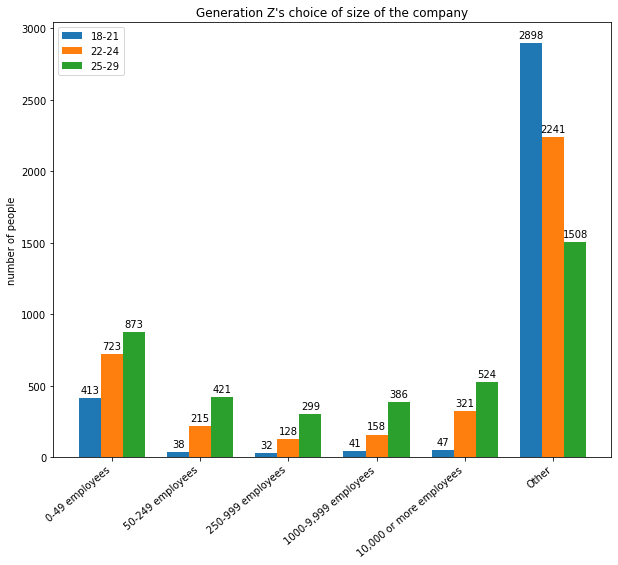

In [27]:
width = 0.25 #width of the bar
columns = age_Comsize_encode.columns


#set position of bar on X axis
p1 = np.arange(len(columns))
≈
 

fig,ax = plt.subplots(figsize = (10,8))

bar1 = ax.bar(p1,height = age_Comsize_encode.sum(),width = width,label = '18-21')
bar2 = ax.bar(p2,height = age_group_2_encode.sum(),width = width,label = '22-24')
bar3 = ax.bar(p3,height = age_group_3_encode.sum(),width = width,label = '25-29')

ax.set_ylabel('number of people')
ax.set_title("Generation Z's choice of size of the company")
ax.set_xticklabels(columns,rotation=40, ha="right")
ax.set_xticks(p2)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.show()

### Comparing with other age range?

In [89]:
#drop all the Generation Z people
index_age_group_1 = df[df['Q1'] == '18-21'].index.tolist()
index_age_group_2 = df[df['Q1'] == '22-24'].index.tolist()
index_age_group_3 = df[df['Q1'] == '25-29'].index.tolist()

joinls = index_age_group_1 + index_age_group_2 + index_age_group_3

df_other_age = df.drop(df.index[joinls])
df_generation_z = df.iloc[joinls]

In [90]:
df_other_age.fillna('Other',inplace = True)
df_other_age.rename(columns = {'Q20':'company size','Q1':'age range'}, inplace = True)
df_generation_z.fillna('Other',inplace = True)
df_generation_z.rename(columns = {'Q20':'company size','Q1':'age range'}, inplace = True)

/Users/maoshirley/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/frame.py:4323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/Users/maoshirley/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [91]:
df_other_age = df_other_age[['age range','company size']]
df_generation_z = df_generation_z[['age range','company size']]

In [93]:
df_other_age_encode = pd.get_dummies(df_other_age['company size'])
df_generation_z_encode = pd.get_dummies(df_generation_z['company size'])

In [94]:
df_other_age_encode = df_other_age_encode[cols]
df_generation_z_encode = df_generation_z_encode[cols]

/Users/maoshirley/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


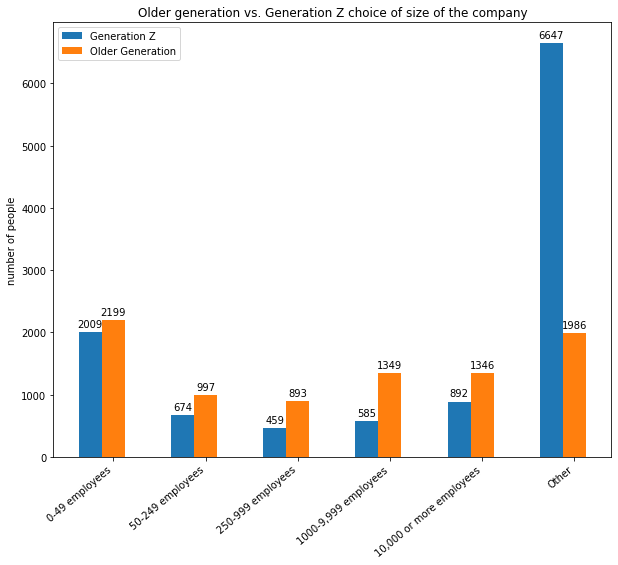

In [102]:
width = 0.25 #width of the bar
columns = age_Comsize_encode.columns


#set position of bar on X axis
p1 = np.arange(len(columns))
p2 = [x + width for x in p1]
p3 = [x + width for x in p2]


fig,ax = plt.subplots(figsize = (10,8))

bar5 = ax.bar(p1,height = df_generation_z_encode.sum(),width = width,label = 'Generation Z')
bar4 = ax.bar(p2,height = df_other_age_encode.sum(),width = width,label = 'Older Generation')


ax.set_ylabel('number of people')
ax.set_title("Older generation vs. Generation Z choice of size of the company")
ax.set_xticklabels(columns,rotation=40, ha="right")
ax.set_xticks(p2)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar5)
autolabel(bar4)



plt.show()

For both age range, not matter the Generation Z or the older generation, people prefer startup more than big corporations. 